In [ ]:
# Importar librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Cargar dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/diabetes2.csv")
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(768, 9)

# Análisis EDA

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Distribución desbalanceada en cuanto a positivos o negativos

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


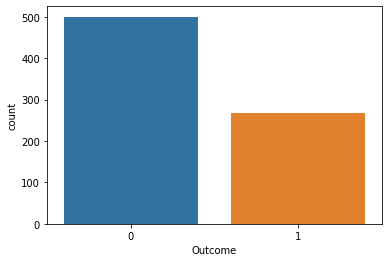

500
268


In [ ]:
sns.countplot('Outcome', data=data)
plt.show()
# Conteo de positivos y negativos
print(data[data["Outcome"] == 0].shape[0])
print(data[data["Outcome"] == 1].shape[0])

## Histogramas

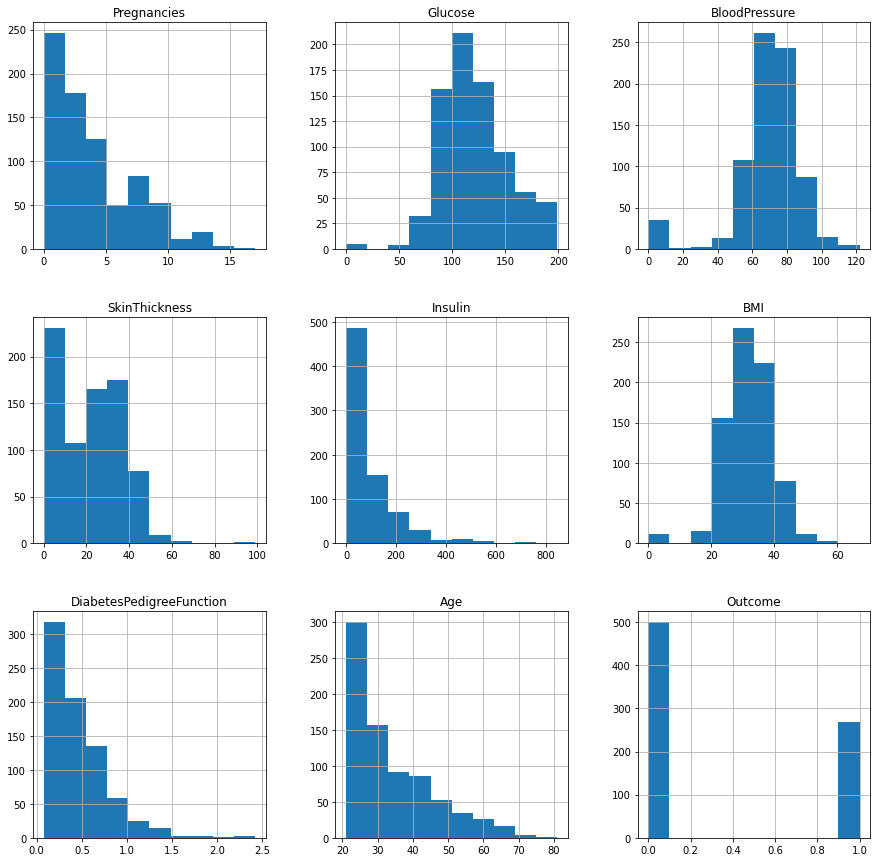

In [ ]:
# Histogramas
data.hist(bins= 10, figsize=(15, 15))
plt.show()

## Valores médicos igual a cero no posibles.
Estos valores no pueden ser igual a cero ya que desde el punto de vista clínico no son coherentes. Estos son:

1.   Insulin
2.   SkinThickness
3.   BloodPressure
4.   BMI
5.   Glucose





In [ ]:
# SkinThickness = 0
print(data[data["Insulin"] == 0].shape[0])
print(data[data["SkinThickness"] == 0].shape[0])
print(data[data["BloodPressure"] == 0].shape[0])
print(data[data["BMI"] == 0].shape[0])
print(data[data["Glucose"] == 0].shape[0])

374
227
35
11
5


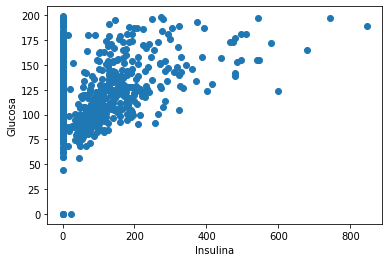

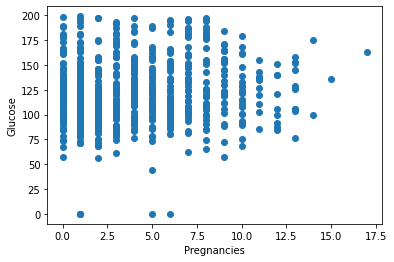

In [ ]:
fig, ax = plt.subplots()
ax.scatter(data.Insulin, data.Glucose)
plt.xlabel('Insulina')
plt.ylabel('Glucosa')
plt.show()
fig, ax = plt.subplots()
ax.scatter(data.Pregnancies, data.Glucose)
plt.xlabel('Pregnancies')
plt.ylabel('Glucose')
plt.show()

# PREPROCESAMIENTO

Empezamos creando un df con las columnas con medidas médicas con valores igual cero

In [ ]:

data_columns_0 = data.drop(["Pregnancies", "DiabetesPedigreeFunction", "Age", "Outcome"], axis='columns') 
# print(data_columns_0.keys())

# Columns = 0
print(data_columns_0[data_columns_0["Insulin"] == 0].shape[0])
print(data_columns_0[data_columns_0["SkinThickness"] == 0].shape[0])
print(data_columns_0[data_columns_0["BloodPressure"] == 0].shape[0])
print(data_columns_0[data_columns_0["BMI"] == 0].shape[0])
print(data_columns_0[data_columns_0["Glucose"] == 0].shape[0])

print(data_columns_0["Insulin"].median())

374
227
35
11
5
30.5


## Imputación
Imputamos los valores en función de las distribuciones de cada columna (media, mediana o moda)

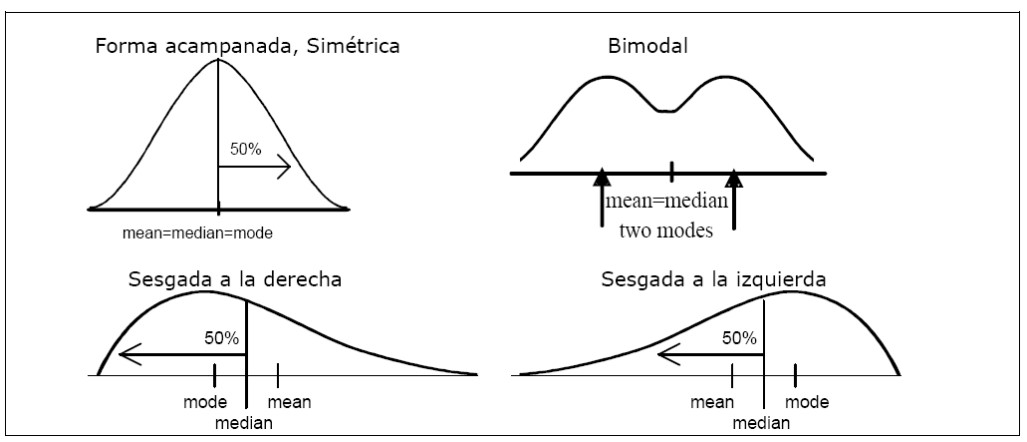

In [ ]:
from IPython import display
display.Image("/content/drive/MyDrive/Colab Notebooks/Imagenes/Distribución_media_mediana.jpg")

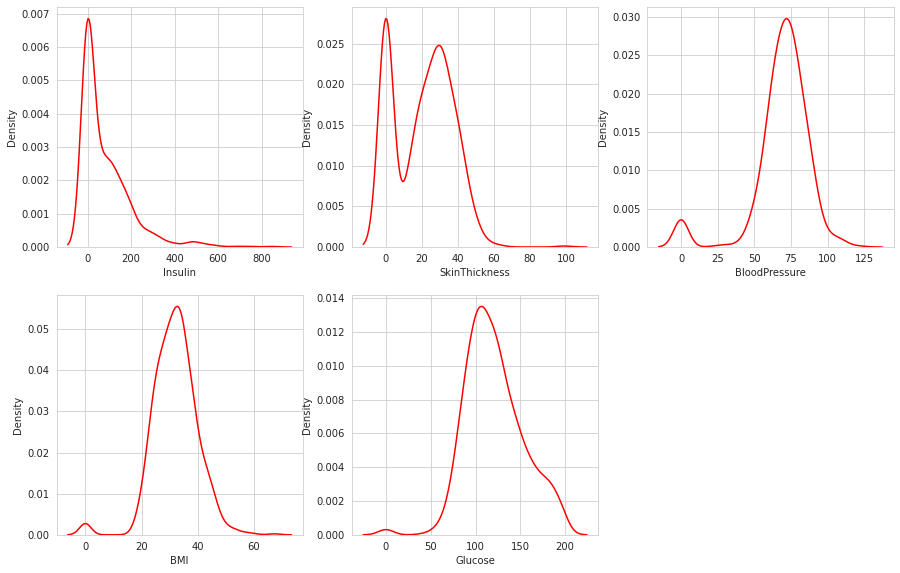

In [ ]:
# Dispersión de cada 'feature'
plt.figure(figsize=(15,15))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.kdeplot(data['Insulin'], color = 'r')
plt.subplot(3,3,2)
sns.kdeplot(data['SkinThickness'], color = 'r')
plt.subplot(3,3,3)
sns.kdeplot(data['BloodPressure'], color = 'r')
plt.subplot(3,3,4)
sns.kdeplot(data['BMI'], color = 'r')
plt.subplot(3,3,5)
sns.kdeplot(data['Glucose'], color = 'r')
plt.show()

In [ ]:
# Imputación
data_columns_impute = pd.DataFrame()

# Distibución sesgada hacia la izquierda por lo que se utiliza la mediana para imputar los valores
data_columns_impute["Insulin"] = data_columns_0["Insulin"].replace(0, data_columns_0["Insulin"].median())
# Distibución sesgada hacia la izquierda por lo que se utiliza la mediana para imputar los valores
data_columns_impute["SkinThickness"] = data_columns_0["SkinThickness"].replace(0, data_columns_0["SkinThickness"].median())
# Distibución normal o centrada por lo que se utiliza la media para imputar los valores
data_columns_impute["BloodPressure"] = data_columns_0["BloodPressure"].replace(0, data_columns_0["BloodPressure"].mean())
# Distibución normal o centrada por lo que se utiliza la media para imputar los valores
data_columns_impute["BMI"] = data_columns_0["BMI"].replace(0, data_columns_0["BMI"].mean())
# Distibución normal o centrada por lo que se utiliza la media para imputar los valores
data_columns_impute["Glucose"] = data_columns_0["Glucose"].replace(0, data_columns_0["Glucose"].mean())

# Columns Imputed = 0
print("Columns Imputed =")
print(data_columns_impute[data_columns_impute["Insulin"] == 0].shape[0])
print(data_columns_impute[data_columns_impute["SkinThickness"] == 0].shape[0])
print(data_columns_impute[data_columns_impute["BloodPressure"] == 0].shape[0])
print(data_columns_impute[data_columns_impute["BMI"] == 0].shape[0])
print(data_columns_impute[data_columns_impute["Glucose"] == 0].shape[0])

data_columns_impute

Columns Imputed =
0
0
0
0
0


,Insulin,SkinThickness,BloodPressure,BMI,Glucose
0,30.5,35,72.0,33.6,148.0
1,30.5,29,66.0,26.6,85.0
2,30.5,23,64.0,23.3,183.0
3,94.0,23,66.0,28.1,89.0
4,168.0,35,40.0,43.1,137.0
...,...,...,...,...,...
763,180.0,48,76.0,32.9,101.0
764,30.5,27,70.0,36.8,122.0
765,112.0,23,72.0,26.2,121.0
766,30.5,23,60.0,30.1,126.0


Creamos el nuevo Dataframe con los valores imputados

In [ ]:
# Dataframe con columnas no imputadas
data_drop = data.drop(columns= data_columns_0.keys())
data_drop.keys()
# Dataframe completo con columnas imputadas
data_imputed = pd.concat([data_drop, data_columns_impute], axis=1)
print(data_imputed[data_imputed["Insulin"] == 0].shape[0])
data_imputed

0


,Pregnancies,DiabetesPedigreeFunction,Age,Outcome,Insulin,SkinThickness,BloodPressure,BMI,Glucose
0,6,0.627,50,1,30.5,35,72.0,33.6,148.0
1,1,0.351,31,0,30.5,29,66.0,26.6,85.0
2,8,0.672,32,1,30.5,23,64.0,23.3,183.0
3,1,0.167,21,0,94.0,23,66.0,28.1,89.0
4,0,2.288,33,1,168.0,35,40.0,43.1,137.0
...,...,...,...,...,...,...,...,...,...
763,10,0.171,63,0,180.0,48,76.0,32.9,101.0
764,2,0.340,27,0,30.5,27,70.0,36.8,122.0
765,5,0.245,30,0,112.0,23,72.0,26.2,121.0
766,1,0.349,47,1,30.5,23,60.0,30.1,126.0


## Histograma con valores Imputados

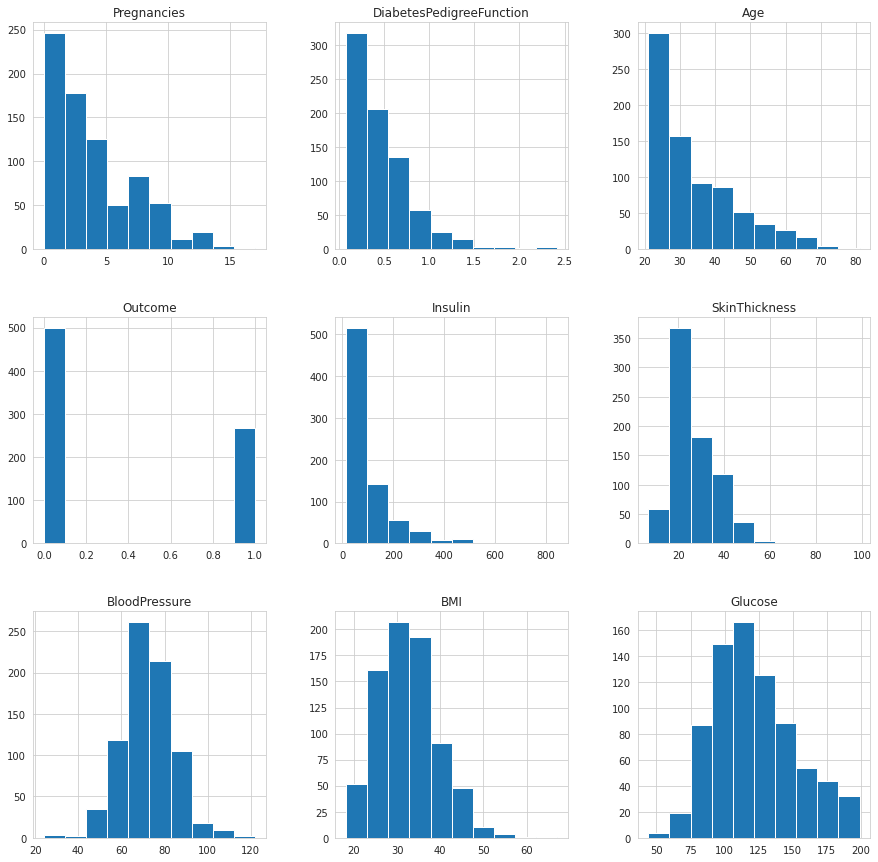

In [ ]:
data_imputed.hist(bins= 10, figsize=(15, 15))
plt.show()

Gráfica de Dispersión antes y despues

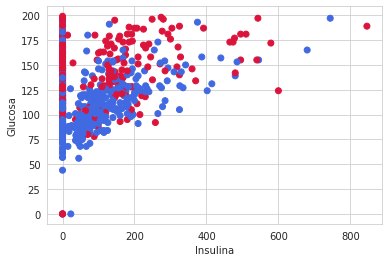

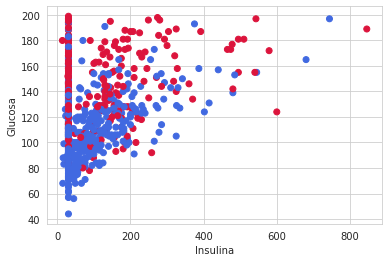

In [ ]:
# Colors
colors = {0: "RoyalBlue", 1: "Crimson"}
outcome_color = data_imputed.Outcome.map(colors)

fig, ax = plt.subplots()
# plt.subplot(1,2,1)
ax.scatter(data.Insulin, data.Glucose, color = outcome_color)
plt.xlabel('Insulina')
plt.ylabel('Glucosa')
plt.show()


fig, ax = plt.subplots()
# plt.subplot(1,2,)
ax.scatter(data_imputed.Insulin, data_imputed.Glucose, color = outcome_color )
plt.xlabel('Insulina')
plt.ylabel('Glucosa')
plt.show()

Arriba. Observamos que los valores de insulina igual a cero se han cambiado por la mediana.

## Distribución insulina y grosor de piel

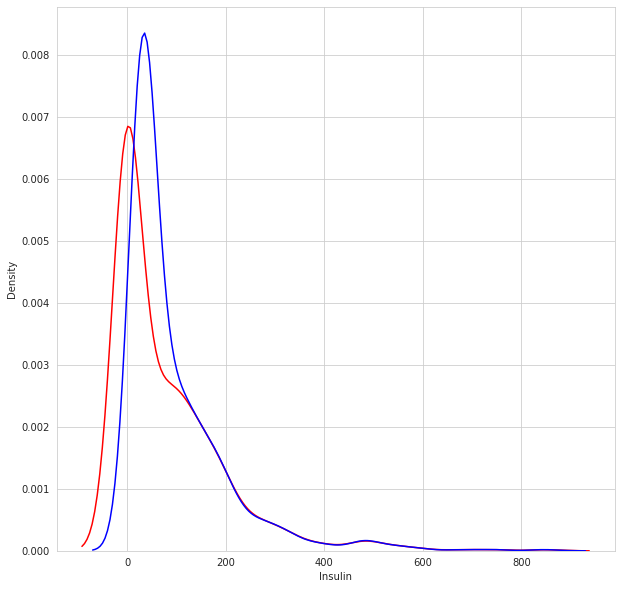

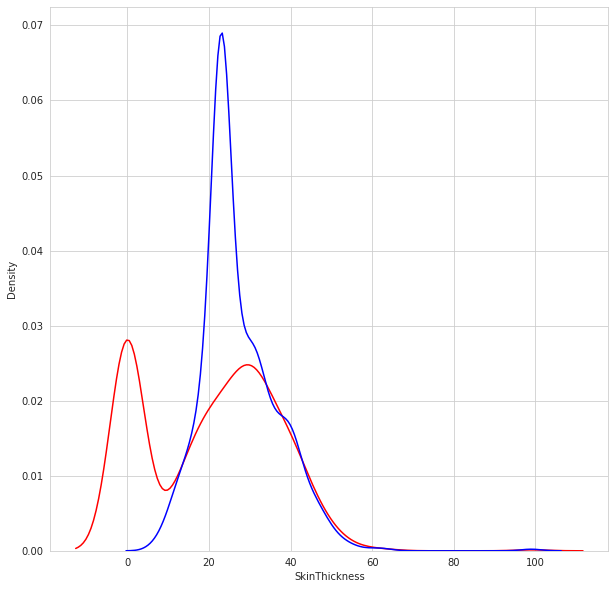

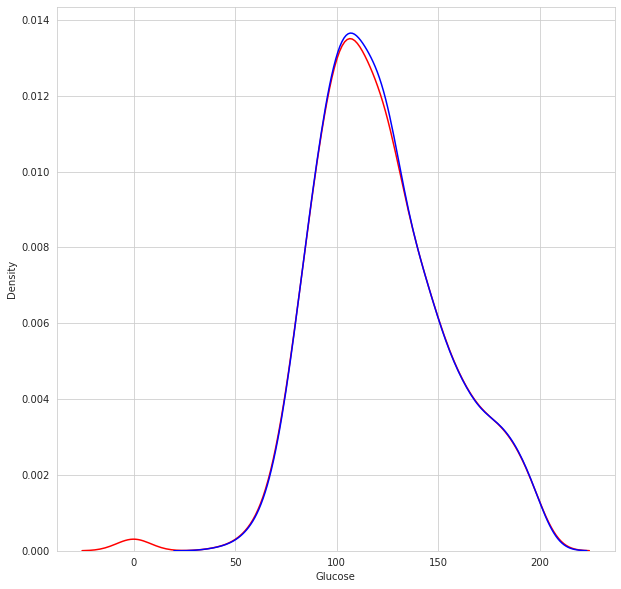

In [ ]:
plt.figure(figsize=(10, 10))
sns.kdeplot(data['Insulin'], color = 'r')
sns.kdeplot(data_imputed['Insulin'], color = 'b')
plt.show()
plt.figure(figsize=(10, 10))
sns.kdeplot(data['SkinThickness'], color = 'r')
sns.kdeplot(data_imputed['SkinThickness'], color = 'b')
plt.show()
plt.figure(figsize=(10, 10))
sns.kdeplot(data['Glucose'], color = 'r')
sns.kdeplot(data_imputed['Glucose'], color = 'b')
plt.show()

Los valores a cero del ancho de la piel no son representativos en la distribución ya que a nivel clínico no son posibles

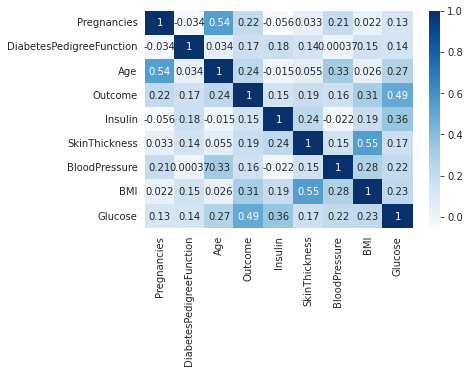

In [ ]:
corr = data_imputed.corr()
ax1 = sns.heatmap(corr, cmap='Blues', annot=True)
plt.show()

Las correlaciónes más significativas con respecto a la salida son: **Glucosa, BMI, Age.**

# **Outliers**

## Caja de Bigotes con y sin Imputación

Sin imputación


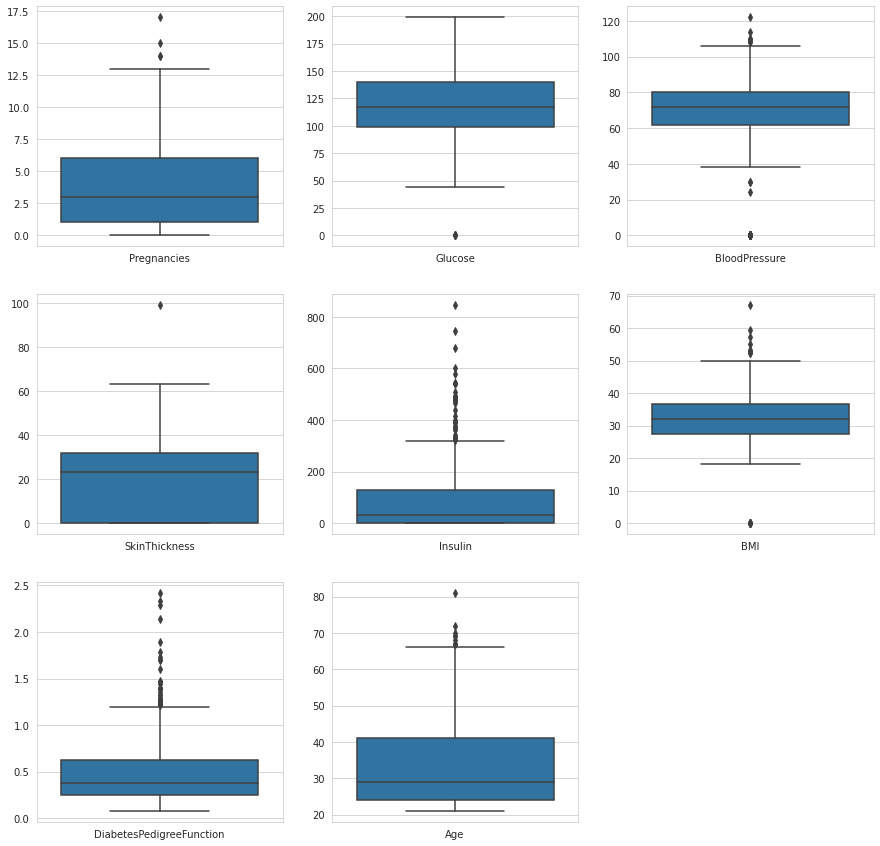

In [ ]:
# Identificar y graficar outliers
plt.figure(figsize=(15,15))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(data=data[['Pregnancies']])
plt.subplot(3,3,2)
sns.boxplot(data=data[['Glucose']])
plt.subplot(3,3,3)
sns.boxplot(data=data[['BloodPressure']])
plt.subplot(3,3,4)
sns.boxplot(data=data[['SkinThickness']])
plt.subplot(3,3,5)
sns.boxplot(data=data[['Insulin']])
plt.subplot(3,3,6)
sns.boxplot(data=data[['BMI']])
plt.subplot(3,3,7)
sns.boxplot(data=data[['DiabetesPedigreeFunction']])
plt.subplot(3,3,8)
sns.boxplot(data=data[['Age']])
plt.show()

Con Imputación

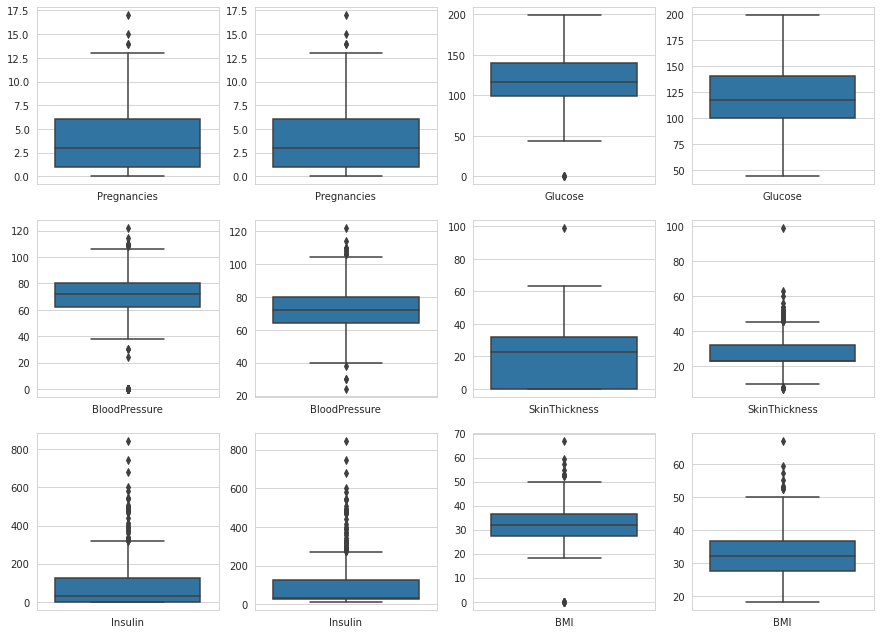

In [ ]:
# Identificar y graficar outliers
plt.figure(figsize=(15,15))
sns.set_style(style='whitegrid')
plt.subplot(4,4,1)
sns.boxplot(data=data[['Pregnancies']])
plt.subplot(4,4,2)
sns.boxplot(data=data_imputed[['Pregnancies']])
plt.subplot(4,4,3)
sns.boxplot(data=data[['Glucose']])
plt.subplot(4,4,4)
sns.boxplot(data=data_imputed[['Glucose']])
plt.subplot(4,4,5)
sns.boxplot(data=data[['BloodPressure']])
plt.subplot(4,4,6)
sns.boxplot(data=data_imputed[['BloodPressure']])
plt.subplot(4,4,7)
sns.boxplot(data=data[['SkinThickness']])
plt.subplot(4,4,8)
sns.boxplot(data=data_imputed[['SkinThickness']])
plt.subplot(4,4,9)
sns.boxplot(data=data[['Insulin']])
plt.subplot(4,4,10)
sns.boxplot(data=data_imputed[['Insulin']])
plt.subplot(4,4,11)
sns.boxplot(data=data[['BMI']])
plt.subplot(4,4,12)
sns.boxplot(data=data_imputed[['BMI']])

In [ ]:
data_imputed.describe()

,Pregnancies,DiabetesPedigreeFunction,Age,Outcome,Insulin,SkinThickness,BloodPressure,BMI,Glucose
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,0.471876,33.240885,0.348958,94.652344,27.334635,72.254807,32.450805,121.681605
std,3.369578,0.331329,11.760232,0.476951,105.547598,9.229014,12.115932,6.875374,30.436016
min,0.000000,0.078000,21.000000,0.000000,14.000000,7.000000,24.000000,18.200000,44.000000
25%,1.000000,0.243750,24.000000,0.000000,30.500000,23.000000,64.000000,27.500000,99.750000
50%,3.000000,0.372500,29.000000,0.000000,31.250000,23.000000,72.000000,32.000000,117.000000
75%,6.000000,0.626250,41.000000,1.000000,127.250000,32.000000,80.000000,36.600000,140.250000
max,17.000000,2.420000,81.000000,1.000000,846.000000,99.000000,122.000000,67.100000,199.000000


## Las siguientes features presentan la outliers

*   Insulina (Por encima)
*   BloodPressure (Por debajo)

### Comparacíon de caja de bigotes entre la feature original y la escalada

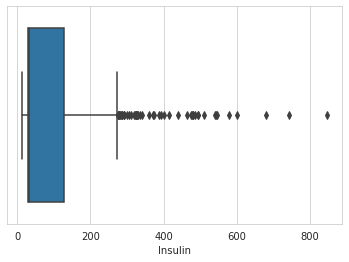

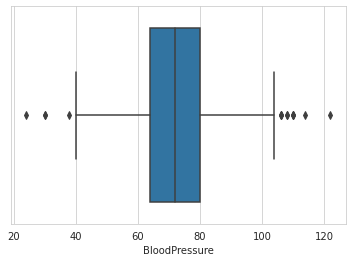

In [ ]:
sns.boxplot(x = data_imputed["Insulin"]);
plt.show()
data_imputed["Insulin"].describe()

sns.boxplot(x = data_imputed["BloodPressure"]);
plt.show()

## Identificar valores atípicos utilizando Z-score.

In [ ]:
# Insulina
z_scores = np.abs(stats.zscore(data["Insulin"]))
outliers = np.where(z_scores > 3)
outliers

(array([  8,  13, 111, 153, 186, 220, 228, 247, 286, 370, 409, 415, 486,
        584, 645, 655, 695, 753]),)

## Escalamiento: Quantile Scaler

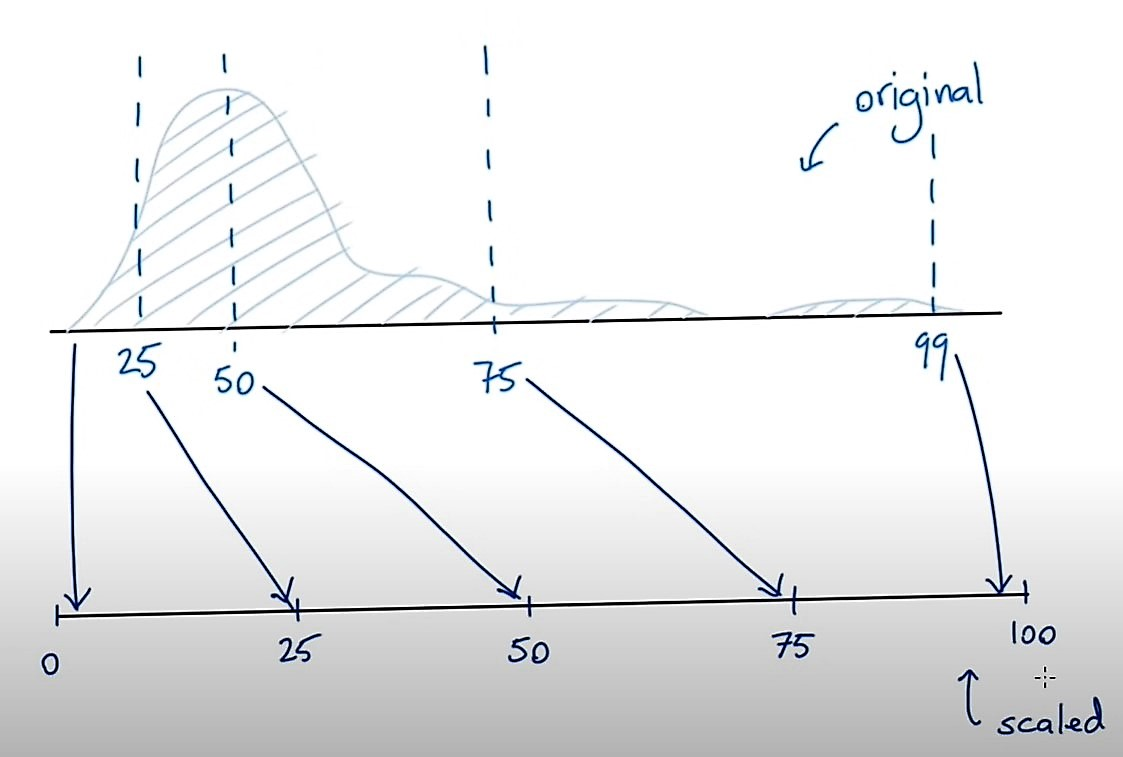

In [ ]:
display.Image("/content/drive/MyDrive/Colab Notebooks/Imagenes/quantile_escaler.jpg")

In [ ]:
# Separación en X e y
X = data_imputed.drop(['Outcome'], axis=1)
y = data_imputed['Outcome']

In [ ]:
X

,Pregnancies,DiabetesPedigreeFunction,Age,Insulin,SkinThickness,BloodPressure,BMI,Glucose
0,6,0.627,50,30.5,35,72.0,33.6,148.0
1,1,0.351,31,30.5,29,66.0,26.6,85.0
2,8,0.672,32,30.5,23,64.0,23.3,183.0
3,1,0.167,21,94.0,23,66.0,28.1,89.0
4,0,2.288,33,168.0,35,40.0,43.1,137.0
...,...,...,...,...,...,...,...,...
763,10,0.171,63,180.0,48,76.0,32.9,101.0
764,2,0.340,27,30.5,27,70.0,36.8,122.0
765,5,0.245,30,112.0,23,72.0,26.2,121.0
766,1,0.349,47,30.5,23,60.0,30.1,126.0


In [ ]:
from sklearn.preprocessing import QuantileTransformer
quantile_scale = QuantileTransformer()

data_scaled = quantile_scale.fit_transform(X)
data_scaled = pd.DataFrame(data_scaled)
data_scaled.columns =["Pregnancies",	"DiabetesPedigreeFunction",	"Age",	"Insulin",	"SkinThickness",	"BloodPressure",	"BMI",	"Glucose"]
data_scaled.describe()

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn(


,Pregnancies,DiabetesPedigreeFunction,Age,Insulin,SkinThickness,BloodPressure,BMI,Glucose
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.489773,0.500059,0.496769,0.500070,0.500278,0.500138,0.500077,0.500081
std,0.303331,0.289228,0.294365,0.272065,0.284153,0.288977,0.289233,0.289222
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.232725,0.250978,0.254889,0.256193,0.357888,0.233377,0.248370,0.255704
50%,0.503259,0.500000,0.496741,0.378422,0.357888,0.516949,0.494133,0.495437
75%,0.747718,0.750000,0.762060,0.750000,0.735332,0.760104,0.752934,0.748696
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Distribuciones originales vs Escaladas

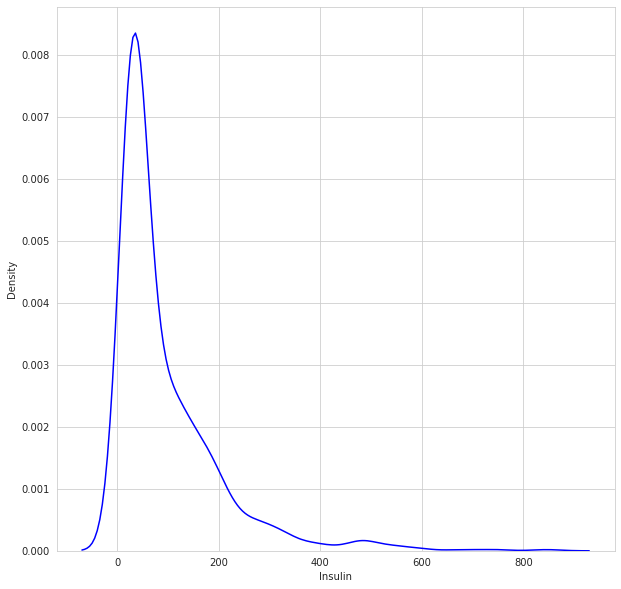

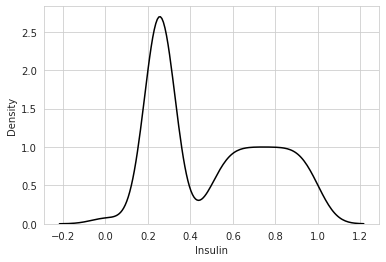

In [ ]:
#Ejemplo Insulina
plt.figure(figsize=(10, 10))
# sns.displot(df['MSSubClass'], kde = True)
sns.kdeplot(data_imputed['Insulin'], color = 'b')
plt.show()
sns.kdeplot(data_scaled['Insulin'], color = 'k')

**Arriba:** Hemos agrupado los valores más altos en un solo grupo (derecha). De esta forma los outliers no están tan alejados (Ejem:800) en la distribución

## Outliers en diagrama de Bigotes: Sin y con escalamiento

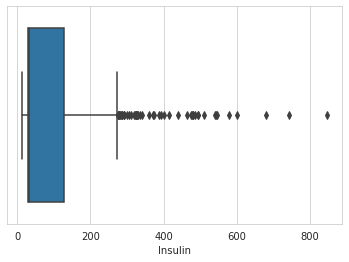

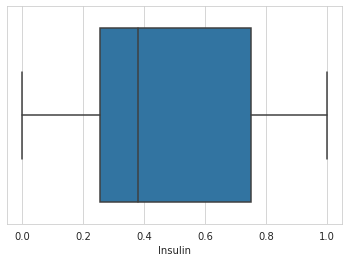

In [ ]:
sns.boxplot(x = data_imputed["Insulin"]); 
plt.show()

sns.boxplot(x = data_scaled["Insulin"]); 
plt.show()

Arriba: Hemos estandarizado los outliers

# Entrenamiento del Modelo

In [ ]:
# Actualizo valor de X con df escalado
X = data_scaled
X.head()

,Pregnancies,DiabetesPedigreeFunction,Age,Insulin,SkinThickness,BloodPressure,BMI,Glucose
0,0.747718,0.750978,0.889831,0.256193,0.801825,0.516949,0.591265,0.810300
1,0.232725,0.475880,0.558670,0.256193,0.644720,0.290091,0.213168,0.091265
2,0.863755,0.782269,0.585398,0.256193,0.357888,0.233377,0.077575,0.956975
3,0.232725,0.106258,0.000000,0.662973,0.357888,0.290091,0.284224,0.124511
4,0.000000,0.997392,0.606258,0.834420,0.801825,0.005215,0.926988,0.721643


In [ ]:
from random import randint
from sklearn.model_selection import train_test_split

seed = 345
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= seed)

In [ ]:
# Número de muestras por bloque
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


## KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_range = list(range(1,100))
accuracy_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, y_pred))


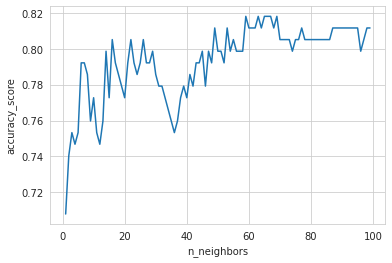

0.8181818181818182


In [ ]:
fig, ax = plt.subplots()
ax.plot(k_range, accuracy_scores)
ax.set_xlabel("n_neighbors")
ax.set_ylabel("accuracy_score")
plt.show()

# plt.plot(k_range, accuracy_scores)
# plt.show()
print(max(accuracy_scores))

**Estimador sin CV accuracy=0.81** en el **modelo anterior tuve 0,74**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=68)
knn.fit(X_train, y_train)
print(metrics.accuracy_score(y_test, y_pred))

0.8116883116883117


### Métricas

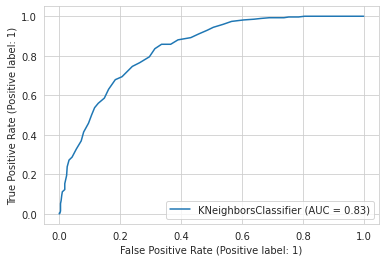

In [ ]:
from sklearn.metrics import RocCurveDisplay
grafica = RocCurveDisplay.from_estimator(knn, X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


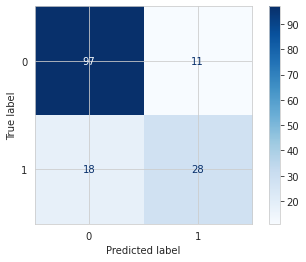

In [ ]:
from sklearn.metrics import plot_confusion_matrix
# Matriz de confusión
matrix = plot_confusion_matrix(knn, X_test, y_test, cmap="Blues")

In [ ]:
from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       108
           1       0.73      0.59      0.65        46

    accuracy                           0.81       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.81      0.81      0.81       154



## Utilizando Cross Validate con el modelo knn

In [ ]:
from sklearn.model_selection import cross_validate
# cross_validate also allows to specify metrics which you want to see
for i, score in enumerate(cross_validate(knn, X,y, cv=10)["test_score"]):
    print(f"Accuracy for the fold no. {i} on the test set: {score}")

Accuracy for the fold no. 0 on the test set: 0.6883116883116883
Accuracy for the fold no. 1 on the test set: 0.7532467532467533
Accuracy for the fold no. 2 on the test set: 0.7662337662337663
Accuracy for the fold no. 3 on the test set: 0.6883116883116883
Accuracy for the fold no. 4 on the test set: 0.7142857142857143
Accuracy for the fold no. 5 on the test set: 0.8051948051948052
Accuracy for the fold no. 6 on the test set: 0.7792207792207793
Accuracy for the fold no. 7 on the test set: 0.8051948051948052
Accuracy for the fold no. 8 on the test set: 0.7236842105263158
Accuracy for the fold no. 9 on the test set: 0.8157894736842105


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


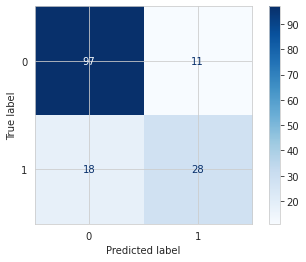

In [ ]:
seed = 345
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= seed)
matrix = plot_confusion_matrix(knn, X_test, y_test, cmap="Blues")

### Entrenando el modelo con KFold

In [ ]:
from sklearn.model_selection import KFold
seed = 345

kf = KFold(n_splits=10, random_state=seed, shuffle=True)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] 
    
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    print(metrics.accuracy_score(y_test, y_pred))
    print(metrics.confusion_matrix(y_test, y_pred))


0.7922077922077922
[[49  7]
 [ 9 12]]
0.7792207792207793
[[47  5]
 [12 13]]
0.5844155844155844
[[36 15]
 [17  9]]
0.7272727272727273
[[46  4]
 [17 10]]
0.7532467532467533
[[45  5]
 [14 13]]
0.7012987012987013
[[39  5]
 [18 15]]
0.7402597402597403
[[44  3]
 [17 13]]
0.8181818181818182
[[49  1]
 [13 14]]
0.7368421052631579
[[42  5]
 [15 14]]
0.8026315789473685
[[50  3]
 [12 11]]


# Buesqueda de Hiperparametros (Tuning): RandomizedSearch

 **CV = RepeatedStratifiedKFold**
"Both StratifiedKFold and RepeatedStratifiedKFold can be very effective when used on classification problems with a severe class **imbalance**." 
https://stackoverflow.com/questions/71181291/differences-between-repeatedstratifiedkfold-and-stratifiedkfold-in-sklearn

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
# Validación Cruzada módificada
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=5, random_state=456)

Vamos hacer uso de Pipelines

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

# Creamos Pipeline
pipeline = Pipeline([
    ("model", KNeighborsClassifier())
])

# Valores de n_neighbors a ser probados
param_neighbors ={
    'model__n_neighbors': list(range(1,100))
} 

# Evaluación de los distintos parametros aplicando un Cross Validation modificado (RepeatedStratifiedKFold)
pipeline = RandomizedSearchCV(
                                pipeline,
                                param_neighbors,
                                scoring = 'accuracy',
                                verbose = True,
                                n_iter = 200,
                                cv= cv #Cross Validation
    
)

pipeline.fit(X, y)

Fitting 75 folds for each of 99 candidates, totalling 7425 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 99 is smaller than n_iter=200. Running 99 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=15, random_state=456),
                   estimator=Pipeline(steps=[('model',
                                              KNeighborsClassifier())]),
                   n_iter=200,
                   param_distributions={'model__n_neighbors': [1, 2, 3, 4, 5, 6,
                                                               7, 8, 9, 10, 11,
                                                               12, 13, 14, 15,
                                                               16, 17, 18, 19,
                                                               20, 21, 22, 23,
                                                               24, 25, 26, 27,
                                                               28, 29, 30, ...]},
                   scoring='accuracy', verbose=True)

Mejores parametro hallado

In [ ]:
pipeline.best_params_

{'model__n_neighbors': 11}

**Accuracy del mejor estimador hallado**

In [ ]:
pipeline.best_estimator_.score(X_test, y_test)

0.9210526315789473

Informe de todas las iteraciones que ha utilizado RandomizedSearchCV para hallar el mejor estimador en función los parametros que se le han pasado

In [ ]:
df_results = pd.DataFrame(pipeline.cv_results_)
df_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split68_test_score,split69_test_score,split70_test_score,split71_test_score,split72_test_score,split73_test_score,split74_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003165,0.000706,0.004190,0.000903,1,{'model__n_neighbors': 1},0.730769,0.634615,0.769231,0.666667,...,0.686275,0.725490,0.647059,0.666667,0.764706,0.725490,0.647059,0.690282,0.056522,99
1,0.003182,0.000572,0.004349,0.001094,2,{'model__n_neighbors': 2},0.730769,0.653846,0.769231,0.686275,...,0.647059,0.725490,0.647059,0.686275,0.764706,0.686275,0.686275,0.704118,0.044377,98
2,0.003461,0.000902,0.004595,0.000967,3,{'model__n_neighbors': 3},0.788462,0.653846,0.807692,0.705882,...,0.725490,0.784314,0.705882,0.647059,0.725490,0.725490,0.764706,0.732534,0.051587,96
3,0.003279,0.000664,0.004410,0.000745,4,{'model__n_neighbors': 4},0.692308,0.692308,0.788462,0.705882,...,0.686275,0.745098,0.725490,0.627451,0.764706,0.764706,0.686275,0.721096,0.050556,97
4,0.003189,0.000488,0.004552,0.000990,5,{'model__n_neighbors': 5},0.750000,0.692308,0.846154,0.745098,...,0.745098,0.745098,0.725490,0.647059,0.784314,0.764706,0.784314,0.741885,0.047812,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.003160,0.000525,0.005478,0.000720,95,{'model__n_neighbors': 95},0.807692,0.730769,0.750000,0.764706,...,0.764706,0.705882,0.666667,0.745098,0.803922,0.745098,0.784314,0.751307,0.052323,25
95,0.003048,0.000449,0.005328,0.000562,96,{'model__n_neighbors': 96},0.807692,0.730769,0.750000,0.725490,...,0.764706,0.705882,0.666667,0.764706,0.784314,0.725490,0.784314,0.749226,0.049884,42
96,0.003097,0.000478,0.005497,0.000857,97,{'model__n_neighbors': 97},0.807692,0.730769,0.750000,0.745098,...,0.784314,0.705882,0.666667,0.745098,0.784314,0.764706,0.784314,0.752076,0.050046,16
97,0.003075,0.000356,0.005435,0.000654,98,{'model__n_neighbors': 98},0.807692,0.750000,0.750000,0.745098,...,0.764706,0.705882,0.666667,0.764706,0.784314,0.745098,0.784314,0.752071,0.049268,17


Probando el mejor estimador con KFold

In [ ]:
seed = 345

kf = KFold(n_splits=10, random_state=seed, shuffle=True)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] 
    
    y_pred = pipeline.best_estimator_.predict(X_test)

    print(metrics.accuracy_score(y_test, y_pred))
    print(metrics.confusion_matrix(y_test, y_pred))

0.8701298701298701
[[49  7]
 [ 3 18]]
0.8311688311688312
[[47  5]
 [ 8 17]]
0.6623376623376623
[[39 12]
 [14 12]]
0.8051948051948052
[[47  3]
 [12 15]]
0.8441558441558441
[[44  6]
 [ 6 21]]
0.7662337662337663
[[38  6]
 [12 21]]
0.7922077922077922
[[41  6]
 [10 20]]
0.7662337662337663
[[44  6]
 [12 15]]
0.75
[[37 10]
 [ 9 20]]
0.9210526315789473
[[50  3]
 [ 3 20]]


## Comparativa de mejores clasificadores:
Matriz de confusión antes y después del tuning. Mejoría significativa en **verdaderos positivos**

### Clasificador sin CV y con parametros puestos de manera "artesanal"


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


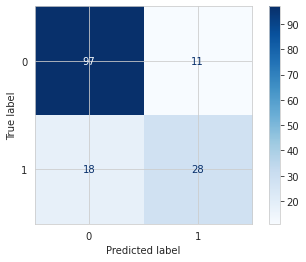

In [ ]:
seed = 345
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= seed)
matrix = plot_confusion_matrix(knn, X_test, y_test, cmap="Blues")

### Clasificador con los mejores hiperparametros hallados utilizando RandomizedSearchCV y RepeatedStratifiedKFold

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


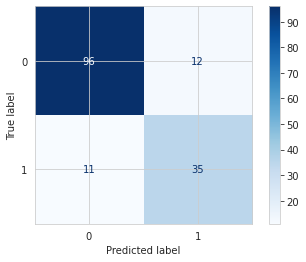

In [ ]:
seed = 345
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= seed)
# Matriz con mejor estimador (pipeline.best_estimator_)
matrix = plot_confusion_matrix(pipeline.best_estimator_, X_test, y_test, cmap="Blues")

Se observa mejora en los Falsos negativos y Falsos Positivos

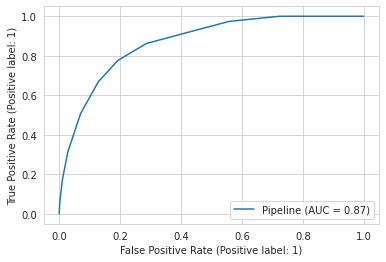

In [ ]:
grafica = RocCurveDisplay.from_estimator(pipeline.best_estimator_, X, y)

In [ ]:
print("No tuning")
y_pred_no_tuning = knn.predict(X_test)
print(classification_report(y_test, y_pred_no_tuning))

print("Tuning")
y_pred_tuning = pipeline.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_tuning))

No tuning
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       108
           1       0.72      0.61      0.66        46

    accuracy                           0.81       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.81      0.81      0.81       154

Tuning
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       108
           1       0.74      0.76      0.75        46

    accuracy                           0.85       154
   macro avg       0.82      0.82      0.82       154
weighted avg       0.85      0.85      0.85       154



# Mejora con respecto a la versión anterior

Recordemos que la primera versión de este modelo tenía un accuracy de 0.74 (ver presentación). 
Aplicando las nuevas técnicas de preprocesamiento, hemos llegado alcanzar un **accuracy de 0.85**

# Serialización del Modelo

In [ ]:
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/Modelos/diabetes_model_best_v1.pkl', 'wb') as f:
    pickle.dump(pipeline.best_estimator_, f)